# Overview

This project analyzes several movie data files in order to help Microsoft develop a movie that will be profitable. The analysis below will demonstrate the need to invest heavily in order to make a profitable film, and provide a recommendation as to which industry personnel to use. The results of this project will help guide Microsoft in its goal. 

# Business Problem

Microsoft has witnessed the trend of major companies producing original video content. Microsoft wants to develop its own films, but needs to know what factors make films successful and profitable. The below analysis will sift through data in order to help Microsoft reach its goals. 

# Data

The data files used for this analysis include the IMDB movie database, a Box Office Mojo gross file, as well as others. 

The files below are: 



1.   An IMDB database that includes tables with many films, their information, and detailed tables about their personnel.
2.   A Box Office Mojo gross file, which is a table containing a list of movies, which studio produced the movie, and its domestic and foreign gross. 
3. A Rotten Tomatoes file containing each film and a synopsis. 
4. A file containing each movie, its budget and its foreign and domestic gross. 
5. A TMDB file that contains each movie, and various information about that movie, like genre and original language. 

The most useful files will be the IMDB database, the BOM gross file and the movie budget file. 



In [79]:
import pandas as pd
import numpy as np

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## IMDB Database

In [81]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/dsc-phase-1-project-v2-4-master/zippedData/im.db')
cur = conn.cursor()

There's no need to look through every file manually, as there's a handy ERD that best depicts the database. 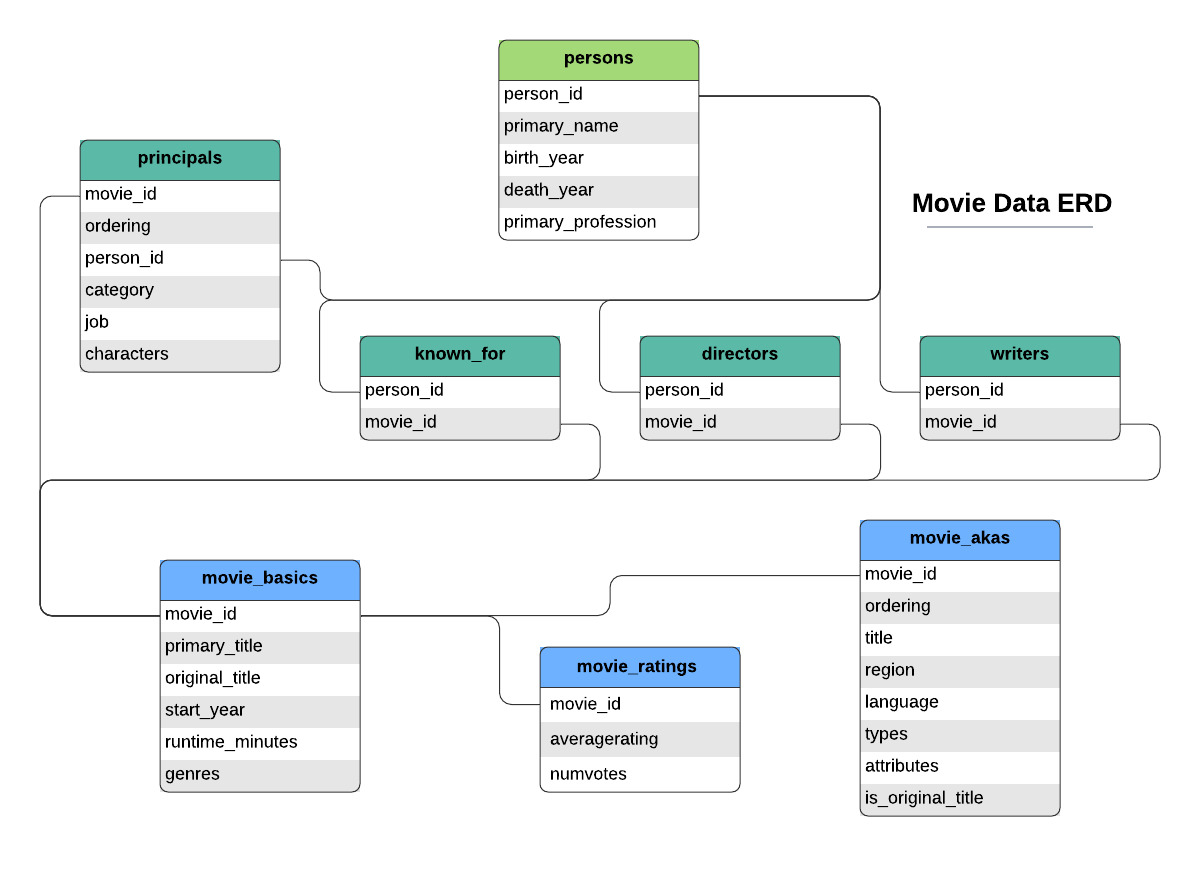

This file contains incredibly useful information, especially the various actors, producers and directors involved with the film.

## Box Office Mojo Gross File

In [82]:
bom_gross_df = pd.read_csv('/content/drive/MyDrive/dsc-phase-1-project-v2-4-master/zippedData/bom.movie_gross.csv.gz')

In [83]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [84]:
bom_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.000,664300000,2010
3,Inception,WB,292600000.000,535700000,2010
4,Shrek Forever After,P/DW,238700000.000,513900000,2010


This file contains a list of movies and their domestic and foreign gorss. 

## Rotten Tomatoes Movie Info

In [85]:
rt_df = pd.read_csv('/content/drive/MyDrive/dsc-phase-1-project-v2-4-master/zippedData/rt.movie_info.tsv', sep='\t')

In [86]:
rt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


The Rotten Tomatoes file includes more informational entries, like a synposis of the film and a genre. 

It's less straightforward than the other files, so let's take a peek at some entries. 


In [87]:
rt_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


## Movie Budget File

In [88]:
movie_budget_df = pd.read_csv('/content/drive/MyDrive/dsc-phase-1-project-v2-4-master/zippedData/tn.movie_budgets.csv')

In [89]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


This file appears particularly promissing, as it can be expected there will be a strong positive correlation between production budget and gross. 

## TMDB File

In [90]:
tmdb = pd.read_csv('/content/drive/MyDrive/dsc-phase-1-project-v2-4-master/zippedData/tmdb.movies.csv.gz')

In [91]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


# Data Preparation



I don't anticipate *every* file to be integral. As a result I'm only going to clean what I'll need for my analysis. 

## Cleaning the movie budget file

The movie budget file (shown above) had no null values. On the other hand, the release date, production budget, domestic gross, and foreign gross columns were stored as objects. They should be changed to date and numerics, respectively. 

Let's check a sample below.

In [92]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


The below code changes ```release_date``` to a datetime object.

In [93]:
movie_budget_df['release_date'] = pd.to_datetime(movie_budget_df['release_date'], format='%b %d, %Y')

Now I'm going to convert ```production_budget```, ```domestic_gross```, and ```worldwide_gross``` to numerics.

In [94]:
# Stripping the dollar sign and commas

from re import sub
from decimal import Decimal

movie_budget_df['production_budget'] = movie_budget_df['production_budget'].map(lambda x: Decimal(sub(r'[^\d.]', '', x)))
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].map(lambda x: Decimal(sub(r'[^\d.]', '', x)))
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].map(lambda x: Decimal(sub(r'[^\d.]', '', x)))

In [95]:
#Assigning to interger 

movie_budget_df['production_budget'] = movie_budget_df['production_budget'].astype(int)
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].astype(int)
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].astype(int)

It will be useful to have a metric that helps demonstrate success, namely how the gross exceeds (or falls short) of the budget. 

Below I'm going to create a column entitled ```gross_budget_multiple``` which returns a multiple of ```worldwide_gross``` divided by ```production_budget```. The numeric is relatively straightforward: a multiple equal to 1 means that the film grossed exactly the amount of the production budget, a multiple less than 1 means the gross fell short of the production budget, and a multiple greater than 1 means the film grossed more than the production budget.








In [96]:
movie_budget_df['gross_budget_multiple'] = movie_budget_df['worldwide_gross']/movie_budget_df['production_budget']

This data set also contains many older movies. Let's take a look. 

In [97]:
movie_budget_df.sort_values(by='release_date').head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_budget_multiple
5677,78,1915-02-08,The Birth of a Nation,110000,10000000,11000000,100.000
5523,24,1916-09-05,Intolerance,385907,0,0,0.000
5614,15,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,40.000
5683,84,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,30.000
5606,7,1925-11-19,The Big Parade,245000,11000000,22000000,89.796


Given that Microsoft needs relevant insights, information from films before 2010 might not be so useful. 

As a result, I'm going to filter out any movie made before 2010.

In [98]:
movie_budget_df = movie_budget_df[movie_budget_df['release_date'].dt.year >= 2010]

Let's take a peek at our finished product.

In [99]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_budget_multiple
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.547
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.428
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.244
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.154
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,6.710


## Cleaning the Box Office Mojo gross file

The BOM file was needs some cleaning. There were quite a few null values.



In [100]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [101]:
bom_gross_df[bom_gross_df['foreign_gross'].isna()].head()

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.000,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.000,NaN,2010
267,Tiny Furniture,IFC,392000.000,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.000,NaN,2010
280,Last Train Home,Zeit.,288000.000,NaN,2010


It seems as if the null values represent films that generated no foreign gross (this, of course, is an assumption). 

This leaves us in a bit of a pickle when it comes to dealing with the null values. I'm weary about replacing with the median value, because these films have a low ```domestic_gross``` which means the median ```foreign_gross``` of higher-grossing, more successful films might not accurately portrary the ```foreign_gross```. 

I could make an assumption that the ```foreign_gross``` for all of these no-name films is 0, but I don't want to throw off the model. 

As a result, I'm going to drop the null values. Even though they account for roughly a third of the rows, we will still have about 2,000 entries to work with. 

In [102]:
bom_gross_df.sort_values(by='domestic_gross', ascending=False).head()

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.000,"1,131.6",2015
3080,Black Panther,BV,700100000.000,646900000,2018
3079,Avengers: Infinity War,BV,678800000.000,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.000,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.000,895500000,2012


It also seems like some of the films with the highest ```domestic_gross``` have foreign gross in the thousands. Given that these are some of the most successful films of all time, that can't be accurate. A quick internet check showed me these films had foreign gross in the billions. 

I'm going to make an assumption that any film with ```foreign_gross``` represented as a thousand-unit number with a comma has a ```foreign_gross``` that's really over 1 billion. Below I will strip the comma, multiply, and convert to a numeric. 

In [103]:
bom_gross_df.dropna(subset=['foreign_gross'], how='all', inplace=True)
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].astype(str)
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].map(lambda x: 1000000*float(x.replace(',', '') if ',' in x else x))
bom_gross_df['foreign_gross'] = bom_gross_df['foreign_gross'].astype(float)

In [104]:
bom_gross_df['total_gross'] = bom_gross_df['foreign_gross'] + bom_gross_df['domestic_gross']

In [105]:
bom_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2037 non-null   object 
 1   studio          2033 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            2037 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 111.4+ KB


As our dataframe seems sufficiently large, I'm going to drop the remaining columns with null values. 

In [106]:
bom_gross_df = bom_gross_df.notna()

## Selecting from the IMDB database

I'm going to want to analyze how certain actors, directors and genres impact gross. 

As a result, I'm going to select each person, by film. This will result in a large dataframe, but will be provide useful when grouping by a given category, like actor, producer etc. 

In [107]:
imdb_df = pd.read_sql("""

SELECT m.primary_title AS movie, 
       m.start_year, 
       m.runtime_minutes, 
       m.genres, 
       pe.primary_name, 
       p.category, 
       p.job, 
       p.characters 
FROM persons pe JOIN principals p USING(person_id) 
                JOIN movie_basics m USING(movie_id)
ORDER BY start_year DESC
""", conn)

In [108]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027912 entries, 0 to 1027911
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   movie            1027912 non-null  object 
 1   start_year       1027912 non-null  int64  
 2   runtime_minutes  827743 non-null   float64
 3   genres           1006183 non-null  object 
 4   primary_name     1027912 non-null  object 
 5   category         1027912 non-null  object 
 6   job              177684 non-null   object 
 7   characters       393171 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.7+ MB


There are quite a lot of entries here. Each person in every film has an entry. We'll reduce this by joining the budget file and dropping null values.

In [109]:
imdb_df.set_index('movie')
imdb_df = imdb_df[imdb_df['runtime_minutes'].notna()]

In [110]:
join = imdb_df.join(movie_budget_df.set_index('movie'), on='movie')
join.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 827839 entries, 49 to 1027910
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   movie                  827839 non-null  object        
 1   start_year             827839 non-null  int64         
 2   runtime_minutes        827839 non-null  float64       
 3   genres                 816725 non-null  object        
 4   primary_name           827839 non-null  object        
 5   category               827839 non-null  object        
 6   job                    150320 non-null  object        
 7   characters             315939 non-null  object        
 8   id                     22082 non-null   float64       
 9   release_date           22082 non-null   datetime64[ns]
 10  production_budget      22082 non-null   float64       
 11  domestic_gross         22082 non-null   float64       
 12  worldwide_gross        22082 non-null   fl

In [111]:
joined = join[join['domestic_gross'].notna()]
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 6796 to 1026600
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie                  22082 non-null  object        
 1   start_year             22082 non-null  int64         
 2   runtime_minutes        22082 non-null  float64       
 3   genres                 22021 non-null  object        
 4   primary_name           22082 non-null  object        
 5   category               22082 non-null  object        
 6   job                    7628 non-null   object        
 7   characters             8832 non-null   object        
 8   id                     22082 non-null  float64       
 9   release_date           22082 non-null  datetime64[ns]
 10  production_budget      22082 non-null  float64       
 11  domestic_gross         22082 non-null  float64       
 12  worldwide_gross        22082 non-null  float64       
 

In [112]:
#Closing the connection 

conn.close()

# Analysis

## Correlation Between Budget And Spending

Let's take a look at some of the highest grossing movies. 

In [113]:
movie_budget_df.sort_values(by='worldwide_gross', ascending=False).head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_budget_multiple
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,6.710
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,7.669
66,67,2015-04-03,Furious 7,190000000,353007020,1518722794,7.993
26,27,2012-05-04,The Avengers,225000000,623279547,1517935897,6.746


All of these films spent hundreds of millions of dollars on production. 

Below, let's return the correlation betewen production bduget and worldwide gross. 

In [114]:
movie_budget_df['worldwide_gross'].corr(movie_budget_df['production_budget'])

0.7936375869164435

There is a very high positive correlation between budget and worldwide gross. In order to earn big you have to spend big. 

But let's see how much to spend, exactly.

In [115]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
movie_budget_df['gross_budget_multiple'].describe()

count   2194.000
mean       3.210
std       10.509
min        0.000
25%        0.216
50%        1.589
75%        3.517
max      416.565
Name: gross_budget_multiple, dtype: float64

On the surface these results don't seem particularly encouraging. The median is 1.6, meaning that most films do not double their production budget. Additionally, the first quartile has a multiple of 0.2, meaning that the gross did not come close to covering the production budget.

There is also some pretty strong positive skew. The median gross/budget multiple is only 1.6, whereas the mean is 3.2. There are obviously a handful of outliers causing this.

We can show this below in a histogram.




In [116]:
import matplotlib.pyplot as plt 
%matplotlib inline

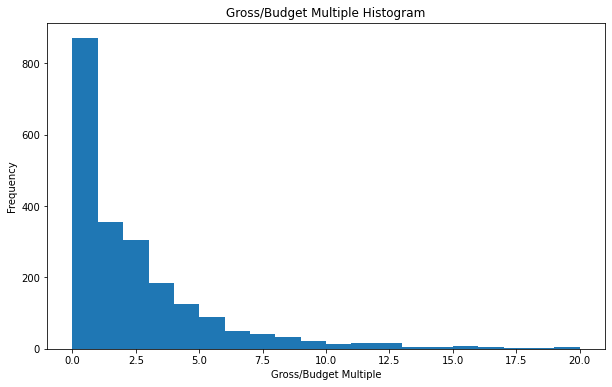

In [117]:
plt.figure(figsize=(10,6))
plt.hist(movie_budget_df['gross_budget_multiple'], bins=20, range=(0, 20))
plt.title('Gross/Budget Multiple Histogram')
plt.xlabel('Gross/Budget Multiple')
plt.ylabel('Frequency');

Since there is a high correlation between budget and gross, I would expect that films that spend above the 50th percecntile would perform better than those that spent below this number. 

Let's check to confirm this.

Below I'm going to plot two graphs, one that shows the quartile ranges and mean for films that spent below the median production budget, and another for films that spent above the median production budget.

In [118]:
x_axis = ['25%', '50%', '75%', 'Mean'] #this will be the x_axis for my graphs

#Below is a function that returns the quartiles and mean for a given dataframe to be used as a y-axis in plotting.

def y_axis(data_frame): 
  y_axis = [data_frame['gross_budget_multiple'].quantile(.25),
            data_frame['gross_budget_multiple'].quantile(.5),
            data_frame['gross_budget_multiple'].quantile(.75),
            data_frame['gross_budget_multiple'].mean()] 
  return y_axis

below_50 = movie_budget_df[movie_budget_df['production_budget'] < movie_budget_df['production_budget'].quantile(.5)]
above_50 = movie_budget_df[movie_budget_df['production_budget'] >= movie_budget_df['production_budget'].quantile(.5)]

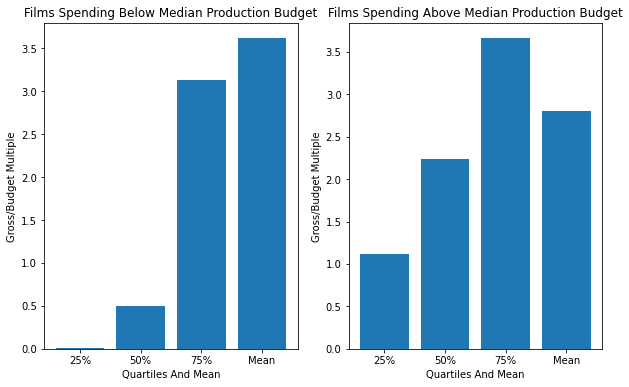

In [119]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,6))
ax1.bar(x_axis, y_axis(below_50))
ax2.bar(x_axis, y_axis(above_50))
ax1.set_title('Films Spending Below Median Production Budget')
ax1.set(xlabel='Quartiles And Mean', ylabel='Gross/Budget Multiple')
ax2.set_title('Films Spending Above Median Production Budget')
ax2.set(xlabel='Quartiles And Mean', ylabel='Gross/Budget Multiple');



The above image is pretty telling. Although movies that had below average production budgets have some strong performers that pull up the mean, most films' gross did not even cover their budget, as represented by a median of around 0.5. 

Movies with above average production budgets faired much better. There isn't a huge discrepancy between the mean and the median. Additionally, the 25th percentile is around 1, which means that most movies with above average production budgets grossed enough to at least cover their production budgets. 

For movies that spent above the median production budget, I want to determine what is the right spending range. Below I'm going to create 5 ranges (50th-60th percentile, 60th-70th, etc) and compare their quartile ranges and mean. 

In [120]:
# A dictionary with the name of the range and the decimals

plot_dict = {'50-60': [.5, .6], '60-70': [.6, .7], '70-80': [.7, .8], '80-90': [.8,.9], '90-100': [.9,1]}

In [121]:
# A for loop that creates a dataframe for each respective range in the above dictionary

new_dict = {}
for key, value in plot_dict.items():
    new_dict[key] = movie_budget_df[(movie_budget_df['production_budget'] >= movie_budget_df['production_budget'].quantile(value[0])) & 
                                    (movie_budget_df['production_budget'] < movie_budget_df['production_budget'].quantile(value[1]))]


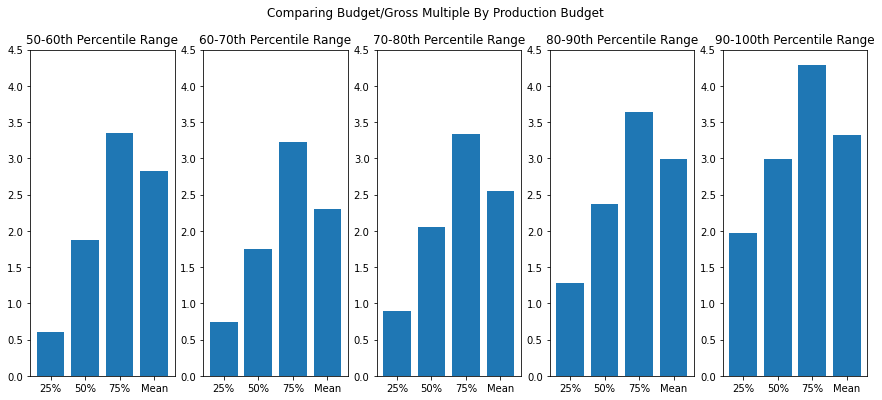

In [122]:
# PLotting to compare the ranges side by side

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
fig.suptitle('Comparing Budget/Gross Multiple By Production Budget')

subplot_list = [ax1, ax2, ax3, ax4, ax5]
df_list = list(new_dict.keys())

for (a,b) in zip(subplot_list, df_list): 
  a.set_ylim(0,4.5)
  a.bar(x_axis, y_axis(new_dict[b]))
  a.set_title(b+'th Percentile Range')

These results are extremely revealing. The movies that were in the 90th percentile for production budget have the most consistent, high-grossing results.

The median is close to 3, which means most films in this budget range are close to having total gross that doubles their production budgets. 

Additionally, the 25th percentile has a multiple close to 2, which means that even if a film isn't particularly profitable, it will still probably come close to having a total gross that is 2x its production budget. 

Let's show the histogram below. 

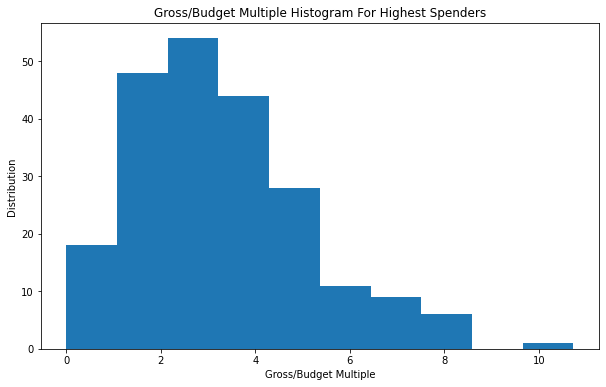

In [123]:
plt.figure(figsize=(10,6))
plt.hist(new_dict['90-100']['gross_budget_multiple'], bins=10)
plt.title('Gross/Budget Multiple Histogram For Highest Spenders')
plt.xlabel('Gross/Budget Multiple')
plt.ylabel('Distribution');

This shows that the films above the 90th percentile production budget can expect a consistent gross/budget multiple. There are not many outliers, and most films are clustered between 1x or 5x. 

We can conclude that having an extremely high production budget essentially guarentees that the film will at least match its production budget, and will most likely exceed it by at least 2x. 

## Picking the right people

Let's reference back to our joined table. 

In [124]:
joined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22082 entries, 6796 to 1026600
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   movie                  22082 non-null  object        
 1   start_year             22082 non-null  int64         
 2   runtime_minutes        22082 non-null  float64       
 3   genres                 22021 non-null  object        
 4   primary_name           22082 non-null  object        
 5   category               22082 non-null  object        
 6   job                    7628 non-null   object        
 7   characters             8832 non-null   object        
 8   id                     22082 non-null  float64       
 9   release_date           22082 non-null  datetime64[ns]
 10  production_budget      22082 non-null  float64       
 11  domestic_gross         22082 non-null  float64       
 12  worldwide_gross        22082 non-null  float64       
 

Running a SQL query on this will be much easier. Below I'm going to import the PandaSQL library and query a dataframe that groups the industry people by the amount of films they've produced and some other helpful aggregates. 

In [125]:
pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
import pandasql as ps

In [127]:
query = ('''
SELECT primary_name as name, 
       count(movie) as movie_count, 
       job, 
       AVG(production_budget),
       AVG(domestic_gross), 
       AVG(worldwide_gross),
       AVG(gross_budget_multiple)
FROM joined 
GROUP BY name 
ORDER BY movie_count DESC
''')

In [128]:
people = ps.sqldf(query, locals())

In [129]:
people.describe()

,movie_count,AVG(production_budget),AVG(domestic_gross),AVG(worldwide_gross),AVG(gross_budget_multiple)
count,14440.000,14440.000,14440.000,14440.000,14440.000
mean,1.529,29385269.387,36128359.309,87508819.824,3.207
std,1.539,40985332.145,63905863.633,168364798.659,11.457
min,1.000,1400.000,0.000,0.000,0.000
25%,1.000,3000000.000,35688.000,462206.000,0.117
50%,1.000,14000000.000,9753885.250,20927794.000,1.498
75%,1.000,36000000.000,44807605.847,95127344.000,3.324
max,40.000,410600000.000,700059566.000,1517935897.000,416.565


There are many people who have only worked on one film. Although they may have been successful, they don't have the type of experience or reputation that Microsoft needs to produce a successful film. 

I'm going to filter out people who have only worked on one film. I'm then going to order the remaining entries by the average gross/budget multiple.

In [130]:
people = people[people['movie_count'] > 2]
people.sort_values(by='AVG(gross_budget_multiple)', ascending=False).head(20)

,name,movie_count,job,AVG(production_budget),AVG(domestic_gross),AVG(worldwide_gross),AVG(gross_budget_multiple)
1158,Guymon Casady,3,producer,20033333.333,34689026.333,70106925.333,140.729
141,Oren Peli,9,producer,4111111.111,46243553.111,103332400.444,30.459
893,Steven Schneider,4,producer,5375000.000,44705643.500,86475965.750,27.972
0,Jason Blum,40,producer,5807900.000,47198849.425,87581237.500,27.032
1364,Mike Gioulakis,3,director of photography,15000000.000,141394506.667,259492873.667,26.923
1141,Gary Dauberman,3,written by,18833333.333,171282587.333,419901918.000,26.601
222,Christopher Landon,7,screenplay,6714285.714,51797479.571,117574190.286,25.785
1162,Henry Joost,3,None,10000000.000,65504256.000,140170040.000,24.501
967,Ariel Schulman,3,None,10000000.000,65504256.000,140170040.000,24.501
774,Leigh Whannell,4,written by,16125000.000,59384004.250,113791858.750,23.076


There's one name on this list that stands out above the rest. 

Jason Blum, the award winning producer, has one of the higest multiples. But what's incredible is that he's been involved with 40 films. This makes his success harder to attribute to outliers, unlike some of the other individuals with high average multiples. 

Let's take a closer look at Blum's films. 

In [131]:
blum = joined[joined['primary_name'] == 'Jason Blum']
blum = blum.sort_values(by='gross_budget_multiple', ascending=False).drop(columns=['primary_name', 'category', 'job', 'characters', 'id'])

In [132]:
blum.set_index('movie').head(10)

,start_year,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,gross_budget_multiple
movie,,,,,,,,
The Gallows,2015,81.000,"Horror,Mystery,Thriller",2015-07-10,100000.000,22764410.000,41656474.000,416.565
Insidious,2010,103.000,"Horror,Mystery,Thriller",2011-04-01,1500000.000,54009150.000,99870886.000,66.581
Paranormal Activity 2,2010,91.000,Horror,2010-10-20,3000000.000,84752907.000,177512032.000,59.171
Split,2016,117.000,"Horror,Thriller",2017-01-20,5000000.000,138141585.000,278964806.000,55.793
Get Out,2017,104.000,"Horror,Mystery,Thriller",2017-02-24,5000000.000,176040665.000,255367951.000,51.074
Paranormal Activity 3,2011,83.000,"Horror,Mystery,Thriller",2011-10-21,5000000.000,104028807.000,207039844.000,41.408
The Purge,2013,85.000,"Horror,Thriller",2013-06-07,3000000.000,64473115.000,91266581.000,30.422
Sinister,2012,110.000,"Horror,Mystery,Thriller",2012-10-12,3000000.000,48086903.000,87727807.000,29.243
Paranormal Activity 4,2012,88.000,"Horror,Mystery,Thriller",2012-10-19,5000000.000,53900335.000,142817992.000,28.564


This is a pretty impressive track record. The Gallows is an obvious outlier, but even without out this Blum continuously outperforms the average gross/budget numbers. 

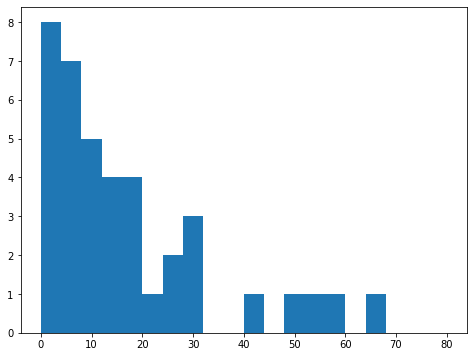

In [133]:
plt.figure(figsize=(8,6))
plt.hist(blum['gross_budget_multiple'], bins=20, range=(0,80));

The histogram shows us that a large majority of Blum's films have a gross/budget multiple above 5, and probably close to a half with a multiple exceeding 10. 

Blum is an unquestioned profitability machine. He seems like an obvious pick to produce for Microsoft. 

## Finding the right genre

If there's anything our analysis has shown us thus far, it's that Jason Blum has the Midas touch. 

His go-to genre is obviously horror. 

Let's see how other genres fare when it comes to their success. 

In [134]:
genres_query = ("""

SELECT genres, 
       COUNT(movie) as count,
       AVG(domestic_gross) as avg_domestic_gross,
       AVG(worldwide_gross) as avg_worldwide_gross,
       AVG(gross_budget_multiple) as avg_multiple
FROM joined 
GROUP BY genres
ORDER BY avg_multiple DESC
""")

In [135]:
genres_df = ps.sqldf(genres_query, locals())

In [136]:
genres_df.head(10)

,genres,count,avg_domestic_gross,avg_worldwide_gross,avg_multiple
0,"Comedy,Romance,Sport",20,79840974.000,150416235.500,28.808
1,"Horror,Mystery,Thriller",373,44603531.351,92488567.571,27.256
2,"Horror,Romance,Thriller",9,41411015.000,95127344.000,27.179
3,"Adventure,Horror",10,7192291.000,12931420.000,12.931
4,"Biography,Drama,Fantasy",10,25091816.000,44378040.000,12.679
5,"Drama,Fantasy",50,34480377.600,82279889.400,12.599
6,"Biography,Documentary,Sport",2,43787265.000,58978477.000,11.796
7,"Action,Mystery,Sci-Fi",10,102427862.000,348319861.000,10.245
8,"Comedy,Fantasy",39,79301579.410,181320732.615,10.117
9,"Animation,Documentary",7,141094974.286,437076381.714,9.018


Horror and its subsets rounds out 3 of the top 5. 

One might attribute these results to Blum, but we have a record for 40 of his films, and there are close to 400 horror-related films that seem to perform consistently. 

It seems that the horror/thriller genre is a good choice. 

## Caveat

When doing some online research about Jason Blum and his films, I read that he specializes in "micro-budget" films. 

A quick glance at his films mean and median ```production_budget``` will reveal this.

In [137]:
blum['production_budget'].mean()

5807900.0

In [138]:
movie_budget_df['production_budget'].mean()

36533471.69371012

In [139]:
blum['production_budget'].median()

5000000.0

In [140]:
movie_budget_df['production_budget'].median()

16900000.0

This seems to be a bit of a contradiction to our first conclusion, which was to spend big on production budget. 

Although I don't have information that shows me a correlation between general spending (especially advertising) and gross, there's no reason to assume based on the above research that it's not highly positive. 

As a result I'm going to conclude, that the best way for Microsoft to proceed is to give Jason Blum that full reigns to make his typical films, or even a series, but fill out the spending elsewhere, especially in marketing. This will help generate an enormous amount of buzz regarding the upcoming Microsoft/Blum releases. 



# Conclusions

After our analysis we have some concrete recommendations to give Microsoft. 



1.   Don't be afraid to spend big. There is a high correlation between production budget and profit.
2.   Use Jason Blum to produce the content. 
3. Horror is an incredibly profitable genre (and Blum's speciality). 

Following these three recommendations is the data-driven approach to help Microsoft succeed.

